# Reinforcment Learning Practice

This time we were going to optimize the online advertising, find
the best ad, among different designs, the best ad that will convert the maximum customers
to click on the ad and potentially buy the car. This data set is simulation taken from course, where we have 10 different ads and 10000 people (rows) with their future decision - click or not to click on ad (1 and 0) 

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
import random

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

![alt text](UCB_ALgorithm_Slide.png "UCB Algorithm")

In [5]:
def UCB(data, number_of_users):
    N = number_of_users 
    d = data.shape[1] # number of ad
    ads_selected = []
    numbers_of_selections = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0
    for n in range(0, N):
        ad = 0
        max_upper_bound = 0
        for i in range(0, d):
            if (numbers_of_selections[i] > 0):
                average_reward = sums_of_rewards[i] / numbers_of_selections[i]
                delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400 # first bound for the first selected ad
            if(upper_bound > max_upper_bound):
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] = numbers_of_selections[ad] + 1
        reward = data.values[n, ad]
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward
        total_reward = total_reward + reward
    return total_reward, ads_selected, numbers_of_selections

In [6]:
total_reward, ads_selected, numbers_of_selections = UCB(dataset, 10000)
total_reward

2178

## Visualising the results

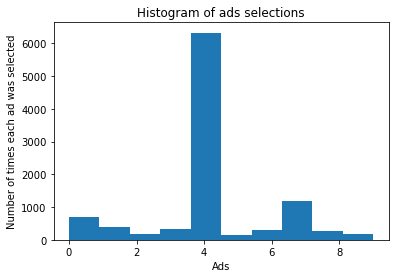

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Checking if algorithm will choose fifth add with less iterations

In [8]:
for n in [10000, 7000, 5000, 2000, 1500, 1000, 800, 500, 100]:
    total_reward, ads_selected, numbers_of_selections = UCB(dataset, n)
    print(
        'Numbers of iterations: {numb}, ad selected: {ad} number of selections: {selections},  total reward: {reward}'.format(
            numb=n, ad=numbers_of_selections.index(max(numbers_of_selections)), selections=max(numbers_of_selections), reward = total_reward
        )
    )

Numbers of iterations: 10000, ad selected: 4 number of selections: 6323,  total reward: 2178
Numbers of iterations: 7000, ad selected: 4 number of selections: 3731,  total reward: 1423
Numbers of iterations: 5000, ad selected: 4 number of selections: 2587,  total reward: 996
Numbers of iterations: 2000, ad selected: 4 number of selections: 685,  total reward: 331
Numbers of iterations: 1500, ad selected: 4 number of selections: 520,  total reward: 245
Numbers of iterations: 1000, ad selected: 4 number of selections: 287,  total reward: 155
Numbers of iterations: 800, ad selected: 4 number of selections: 200,  total reward: 120
Numbers of iterations: 500, ad selected: 7 number of selections: 81,  total reward: 60
Numbers of iterations: 100, ad selected: 7 number of selections: 16,  total reward: 13


So for this algorithm 500 iterations wasn't enough

# Thompson Sampling

## Implementing Thompson Sampling

![alt text](Thompson_Sampling_Slide.png "UCB Algorithm")

In [9]:
def Thompson_Sampling(data, number_of_users):
    N = number_of_users
    d = data.shape[1]
    ads_selected = []
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0
    numbers_of_selections = [0] * d # algorithm dont need this value, it was added for comparing results
    for n in range(0, N):
        ad = 0
        max_random = 0
        for i in range(0, d):
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
            if random_beta > max_random:
                max_random = random_beta
                ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] = numbers_of_selections[ad] + 1
        reward = data.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
        else:
            numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        total_reward = total_reward + reward
    return total_reward, ads_selected, numbers_of_selections

In [10]:
total_reward, ads_selected, numbers_of_selections = Thompson_Sampling(dataset, 10000)
total_reward

2572

## Visualising the results - Histogram

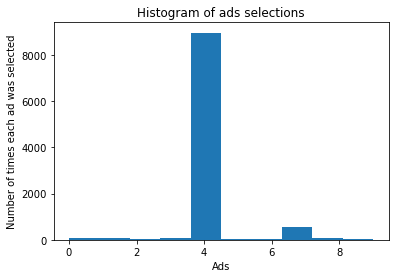

In [11]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

Checking if algorithm will choose fifth add with less iterations

In [17]:
for n in [10000, 7000, 5000, 2000, 1500, 1000, 800, 500, 100]:
    total_reward, ads_selected, numbers_of_selections = Thompson_Sampling(dataset, n)
    print(
        'Numbers of iterations: {numb}, ad selected: {ad} number of selections: {selections},  total reward: {reward}'.format(
            numb=n, ad=numbers_of_selections.index(max(numbers_of_selections)), selections=max(numbers_of_selections), reward = total_reward
        )
    )

Numbers of iterations: 10000, ad selected: 4 number of selections: 9080,  total reward: 2598
Numbers of iterations: 7000, ad selected: 4 number of selections: 6232,  total reward: 1776
Numbers of iterations: 5000, ad selected: 4 number of selections: 4306,  total reward: 1267
Numbers of iterations: 2000, ad selected: 4 number of selections: 1275,  total reward: 467
Numbers of iterations: 1500, ad selected: 4 number of selections: 1234,  total reward: 378
Numbers of iterations: 1000, ad selected: 4 number of selections: 594,  total reward: 210
Numbers of iterations: 800, ad selected: 4 number of selections: 324,  total reward: 163
Numbers of iterations: 500, ad selected: 4 number of selections: 149,  total reward: 89
Numbers of iterations: 100, ad selected: 7 number of selections: 34,  total reward: 16


So, this algorithm determines the best ad even with 500 iterations and it is better to use it while the site is running, since it allows you to change it less often using fewer resources. Comparing these two algorithms, UCB is deterministic and Thompson Sampling (so results can be different) is probabilistic and the second gave better results.